In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from numpy.fft import fft, fftshift, fftfreq, ifft, ifftshift

pi = np.pi
%matplotlib inline

## Lab Task  1

Perform FFT on the sum of sinusoids represented as: $x = \cos(2\pi f_1n) + 3\cos(2\pi f_2n) + 5\cos(2\pi f_3n)$ 

Text(0.5, 1.0, 'Magnitude of X [normalized]')

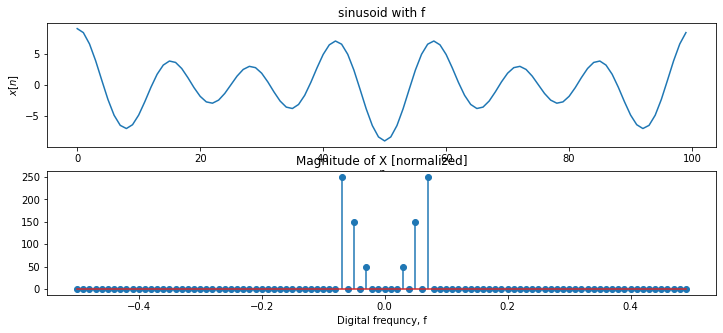

In [ ]:
N = 100

f1 = 0.03
f2 = 0.05
f3 = 0.07

# construct n
n = np.arange(N)

# construct x as per function above
x = np.cos(2*pi*f1*n) + 3*np.cos(2*pi*f2*n) + 5*np.cos(2*pi*f3*n)


# Calculate the FFT of x, X_fft and digital frequency fk
X_fft = fft(x)
X_fft = fftshift(X_fft)

fk = fftfreq(N)
fk = fftshift(fk)

# Plot both the  time domain and frequency domain signals in the same figure using subplots
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize=(12,5))
ax[0].plot(n, x)
ax[0].set_xlabel("$n$")
ax[0].set_ylabel("$x[n]$")
ax[0].set_title(f"sinusoid with f")

ax[1].stem(fk, np.abs(X_fft))
ax[1].set_xlabel("Digital frequncy, f")
ax[1].set_title("Magnitude of X [normalized]")

## Lab Task 2

Reconstruct the time domain signal from $X_{fft}$ and compare with the original time domain signal (plot both signals in the same figure using subplots) 

Text(0.5, 1.0, 'Reconstructed')

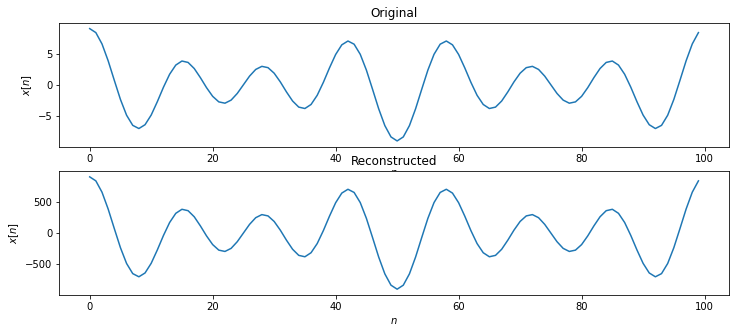

In [ ]:
# Calculate x_recon 
def perform_ifft(X, N):
    X_ishift = ifftshift(X)
    x_recon = ifft(X_ishift)
    x_recon = np.real(x_recon)*N # keeping only real values
    
    nt = np.arange(N)
    if x_recon.shape[0] > N:
        x_recon = x_recon[:N]
    
    return x_recon, nt

x_reconm, n_recon = perform_ifft(X_fft, N)
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize=(12,5))
ax[0].plot(n, x)
ax[0].set_xlabel("$n$")
ax[0].set_ylabel("$x[n]$")
ax[0].set_title(f"Original")

ax[1].plot(n_recon, x_reconm)
ax[1].set_xlabel("$n$")
ax[1].set_ylabel("$x[n]$")
ax[1].set_title(f"Reconstructed")
# Plot both the original and the reconstructed signals


## Lab Task 3

Construct a 2D sinusoidal signal $x$ with $f_x=0.03\;cycles/samples$ and $f_y=0.05\;cycles/samples$ with the total number of samples $N = M = 100$. Perform FFT on $x$ and plot both the $x$ and $X_{fft}$.

Text(0.5, 1.0, 'X_fft')

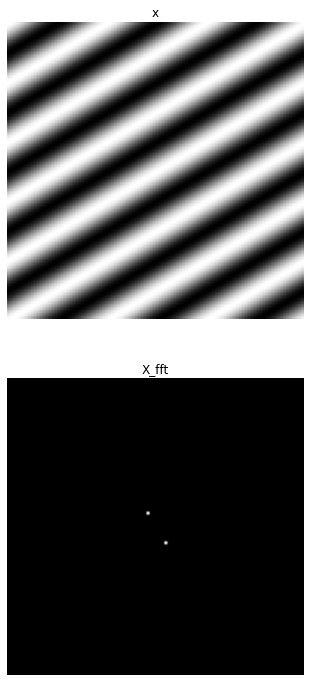

In [10]:
from numpy.fft import fft, fft2, fftshift, fftfreq
N = 100
M = 100

fx = 0.03
fy = 0.05

# consturct n and m
n, m = np.meshgrid(np.arange(N), np.arange(M))

# construct x
x = np.cos(2*pi*fx*n + 2*pi*fy*m)

# find X_fft
X_fft = fft2(x)
X_fft = fftshift(X_fft)

fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize=(12,12))
# plot x
ax[0].imshow(x, cmap="gray")
ax[0].axis("off")
ax[0].set_title(f"x")
# plot X_fft
ax[1].imshow(np.abs(X_fft), cmap="gray")
ax[1].axis("off")
ax[1].set_title(f"X_fft")